In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

In [2]:
np.random.seed(765) # set random seed

In [3]:
df = pd.read_csv('/project/dsc-is/mahfujul-r/M/64/14/HHH14 & C14 & D14.csv', header=None) # load dataframe
df.rename(columns={128: 'class'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,class,129
0,0.011962,0.001973,0.001367,0.002962,0.001333,0.002202,0.005769,0.033465,0.004345,0.001430,...,0.017195,0.174118,0.005366,0.001239,0.001277,0.002776,0.001352,0.001185,5,0.999202
1,0.008064,0.010953,0.009322,0.011646,0.006200,0.005369,0.006142,0.005812,0.005321,0.009789,...,0.008011,0.005950,0.007898,0.007503,0.007313,0.006418,0.007806,0.012057,4,0.954563
2,0.005828,0.006005,0.008902,0.009051,0.004843,0.004849,0.007855,0.004944,0.005632,0.013177,...,0.005849,0.004885,0.008707,0.005392,0.006232,0.004846,0.005679,0.010585,9,0.991519
3,0.006149,0.005634,0.008347,0.008073,0.004685,0.004833,0.009480,0.005227,0.005994,0.010910,...,0.004797,0.004581,0.008218,0.004854,0.005360,0.004903,0.005528,0.009502,9,0.993510
4,0.005791,0.005341,0.009822,0.006371,0.004835,0.005234,0.010832,0.005005,0.005643,0.010369,...,0.005768,0.004834,0.008741,0.005154,0.009980,0.005285,0.007962,0.007531,9,0.793970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.007620,0.007319,0.009012,0.012710,0.006625,0.005289,0.005173,0.005985,0.006173,0.009403,...,0.012556,0.008432,0.006117,0.010189,0.005029,0.006159,0.005143,0.011580,12,0.938352
14996,0.012554,0.022392,0.003200,0.010719,0.017043,0.014301,0.003222,0.006407,0.005324,0.006136,...,0.004529,0.003864,0.005903,0.010401,0.007785,0.003810,0.008888,0.005620,13,0.995013
14997,0.008051,0.010103,0.005452,0.006872,0.012319,0.004491,0.004124,0.004909,0.003900,0.005739,...,0.006884,0.004769,0.004693,0.008354,0.011107,0.004369,0.015668,0.004940,8,0.999779
14998,0.006876,0.005998,0.008397,0.007003,0.005234,0.005256,0.010247,0.005515,0.005823,0.010079,...,0.006449,0.005270,0.007149,0.005652,0.007774,0.006983,0.007518,0.007937,9,0.980402


In [4]:
# separate features and labels

features = df.loc[:, 0:127]
target = df.loc[:, 'class']

In [5]:
# reduce dimension using umap

reduce = umap.UMAP(n_components=2, random_state=765)
embedding = reduce.fit_transform(features)

In [6]:
# visualize umap

Xax = embedding[:, 0]
Yax = embedding[:, 1]

In [7]:
cdict = {0: 'navy', 1: 'yellow', 2: 'c', 3: 'm', 4: 'r', 5: 'b', 6: 'g', 7: 'lime', 8: 'pink', 9: 'gold', 10: 'darkviolet',
         11: 'k', 12: 'orange', 13: 'olive'}
labl = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '12', 12: '13',
        13: '14'}
marker = {0: 'o', 1: 'v', 2: '*', 3: '+', 4: 'x', 5: 'd', 6: 's', 7: 'p', 8: ',', 9: '^', 10: '<', 11: '>', 12: '.', 13: '1'}
alpha = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1}

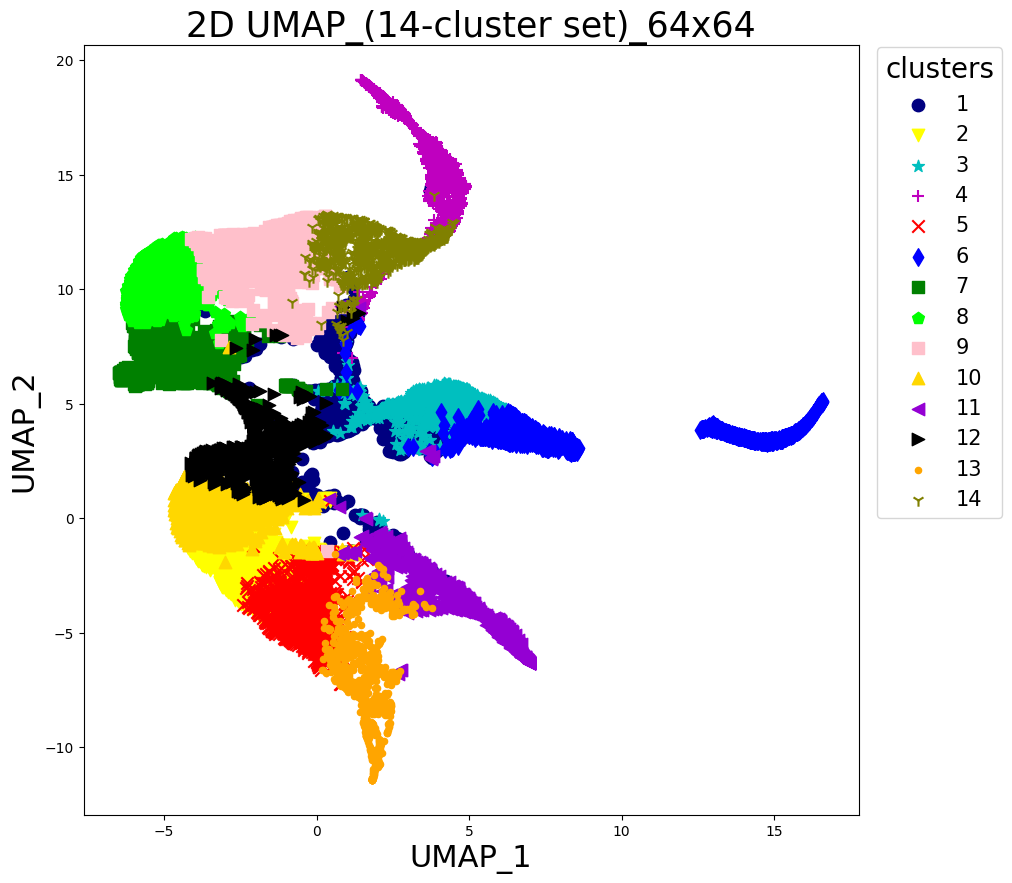

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('white')
for k in np.unique(target):
    ix = np.where(target==k)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[k], s=80, label=labl[k], marker=marker[k], alpha=alpha[k])
ax.set_xlabel('UMAP_1', fontsize=22)
ax.set_ylabel('UMAP_2', fontsize=22)
ax.legend(title='clusters', bbox_to_anchor=(1.01, 1.01), fontsize=15, title_fontsize=20)
ax.set_title('2D UMAP_(14-cluster set)_64x64', fontsize=25);
fig.savefig('umap64.pdf', dpi=300, format='pdf', bbox_inches='tight');